In [49]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline

def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list2))] 
    return merged_list 
def demerge(merged_list):
    list1 = [merged_list[i][0] for i in range(len(merged_list))]
    list2 = [merged_list[i][1] for i in range(len(merged_list))]
    
    return list1,list2

    
# Lista de arquivos ossos original (sem desmineralização)
lista_arq_ossos=os.listdir('Dados/original/')
# Lista de arquivos ossos desmineralização 1
lista_arq_desm1=os.listdir('Dados/desm1/')
# Lista de arquivos ossos desmineralização 2
lista_arq_desm2=os.listdir('Dados/desm2/')
# Lista de arquivos ossos desmineralização 3
lista_arq_desm3=os.listdir('Dados/desm3/')

# Quantidade total de sinais
total_signal = len(lista_arq_ossos)+len(lista_arq_desm1)+len(lista_arq_desm2)+len(lista_arq_desm3)+1

# Matriz zerada para comportar todos os sinais
ossos = np.zeros((total_signal,15997))
# Matriz zerada para comportar todas as classes
classes = np.zeros((total_signal))

data_len = 15999

time = []
for i in range(1,16001):
    time.append(i*2e-8)
    
# Lendo os sinais de ossos sem desmineralização
i=0
# Lendo os sinais de ossos desmineralização 1
for nome2 in lista_arq_desm1:
	arq = open('Dados/desm1/'+nome2,'r')
	data = arq.readlines()
	data = [float(x) for x in data]
	data = data [2:data_len]
	signal = merge(time,data)
	signal_spectral = power_transform(signal,method='yeo-johnson')
	ossos[i,:]= demerge(signal_spectral)[0]
#	classes[i,:] = [0., 1., 0., 0.]
	classes[i] = 1
	i+=1
	data=0
	arq.close()

# Lendo os sinais de ossos desmineralização 2
for nome3 in lista_arq_desm2:
	arq = open('Dados/desm2/'+nome3,'r')
	data = arq.readlines()
	data = [float(x) for x in data]
	data = data [2:data_len]
	signal = merge(time,data)
	signal_spectral = power_transform(signal,method='yeo-johnson')
	ossos[i,:]= demerge(signal_spectral)[0]
#	classes[i,:] = [0., 0., 1., 0.]
	classes[i] = 2
	i+=1
	data=0
	arq.close()

# Lendo os sinais de ossos desmineralização 3
for nome4 in lista_arq_desm3:
	arq = open('Dados/desm3/'+nome4,'r')
	data = arq.readlines()
	data = [float(x) for x in data]
	data = data [2:data_len]
	signal = merge(time,data)
	signal_spectral = power_transform(signal,method="yeo-johnson")
	ossos[i,:]= demerge(signal_spectral)[0]
#	classes[i,:] = [0., 0., 0., 1.]
	classes[i] = 3
	i+=1
	data=0
	arq.close()

ossos = ossos[0:i,:]
classes = classes[0:i]

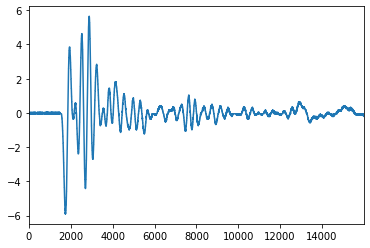

In [46]:
ossos_df.iloc[0,:].plot()

In [45]:
ossos_df = pd.DataFrame(ossos)
classes_df= pd.DataFrame(classes)
classes_df['Desm'] = classes_df[0]
classes_df = classes_df.drop(0,axis=1)
ossos_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15987,15988,15989,15990,15991,15992,15993,15994,15995,15996
0,-0.050592,-0.050592,-0.050592,-0.050592,-0.050592,-0.050592,-0.050592,-0.050592,-0.050592,-0.050592,...,-0.206788,-0.206788,-0.206788,-0.206788,-0.128690,-0.128690,-0.128690,-0.128690,-0.128690,-0.128690
1,-0.034400,-0.034400,-0.034400,-0.034400,-0.034400,-0.034400,-0.034400,-0.034400,-0.034400,-0.034400,...,-0.427776,-0.427776,-0.427776,-0.427776,-0.427776,-0.427776,-0.427776,-0.427776,-0.427776,-0.427776
2,0.002010,0.002010,0.002010,0.002010,0.002010,0.002010,0.002010,0.002010,0.002010,0.002010,...,-0.589580,-0.589580,-0.790956,-0.790956,-0.790956,-0.790956,-0.790956,-0.790956,-0.790956,-0.790956
3,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,...,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598,-0.077598
4,0.061340,0.061340,0.061340,0.061340,-0.050047,-0.050047,-0.050047,-0.050047,-0.050047,-0.050047,...,0.283076,0.283076,0.283076,0.283076,0.283076,0.283076,0.283076,0.172381,0.283076,0.283076


In [2]:
result = pd.concat([ossos_df, classes_df], axis=1, sort=False)
result.head()

NameError: name 'pd' is not defined

In [375]:
X = result.drop(['Desm'],axis=1)
y = result['Desm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, pred_lr))
cm_lr= confusion_matrix(y_test, pred_lr)
cm_lr


c:\users\lucas\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lucas\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

         1.0       0.43      0.09      0.16        95
         2.0       0.42      0.70      0.52       141
         3.0       0.59      0.49      0.54       123

    accuracy                           0.47       359
   macro avg       0.48      0.43      0.40       359
weighted avg       0.48      0.47      0.43       359



array([[ 9, 78,  8],
       [ 9, 99, 33],
       [ 3, 60, 60]], dtype=int64)

In [381]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn))
cm_knn= confusion_matrix(y_test, pred_knn)
cm_knn

              precision    recall  f1-score   support

         1.0       0.51      0.40      0.45        95
         2.0       0.40      0.54      0.46       141
         3.0       0.48      0.37      0.42       123

    accuracy                           0.45       359
   macro avg       0.46      0.44      0.44       359
weighted avg       0.46      0.45      0.44       359



array([[38, 47, 10],
       [25, 76, 40],
       [12, 65, 46]], dtype=int64)

In [ ]:
error_rate = []

# Levará algum tempo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [194]:
X_train=list(X_train)
y_train=list(y_train)

In [195]:
neigh = KNeighborsClassifier(algorithm='auto')
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [189]:
print(classification_report(y_test, predictions))


1128    [-0.000175, -0.000175, -0.000175, -0.000175, -...
165     [-5e-05, -5e-05, -5e-05, -5e-05, -5e-05, -5e-0...
746     [-0.000169221, -0.000169221, -0.000169221, -0....
385     [0.000166206, -7.5e-05, -7.5e-05, -7.5e-05, -7...
865     [-0.000321608, 0.0, 0.0, 0.0, 0.0, 0.0, -0.000...
                              ...                        
793     [-1.809e-05, -1.809e-05, -1.809e-05, -1.809e-0...
117     [-0.00015201, -0.00015201, -0.00015201, -0.000...
544     [0.000217588, 0.000217588, 0.000217588, 0.0002...
222     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1116    [0.0, 0.0, 0.0, -0.00040201, -0.00040201, 0.0,...
Name: Sinais, Length: 359, dtype: object

In [196]:
ossos_df.iloc[713,0]

array([-0.00020678, -0.00020678, -0.00036759, ...,  0.00124045,
        0.00124045,  0.00107965])

In [1]:
neigh.predict_proba([ossos_df.iloc[713,0]])

NameError: name 'neigh' is not defined

In [49]:
clf = SVC(gamma = 'scale',decision_function_shape='ovo')
X = result.drop(['Desm'],axis=1)
y = result['Desm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf.fit(X_train,y_train) 
pred_clf = clf.predict(X_test)
print(classification_report(y_test, pred_clf))
cm_clf= confusion_matrix(y_test, pred_clf)
print(cm_clf)

              precision    recall  f1-score   support

         1.0       0.43      0.60      0.51        81
         2.0       0.48      0.54      0.51       130
         3.0       0.73      0.49      0.58       148

    accuracy                           0.53       359
   macro avg       0.55      0.54      0.53       359
weighted avg       0.57      0.53      0.54       359

[[49 29  3]
 [36 70 24]
 [28 48 72]]
